In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('../data/processed/house_data_processed.csv')

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [3]:
house_data.shape

(21613, 16)

In [4]:
target = house_data['price']

features = house_data.drop('price', axis=1)

In [5]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

In [6]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

/Users/mariuszrokita/anaconda/envs/datascience101/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/mariuszrokita/anaconda/envs/datascience101/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


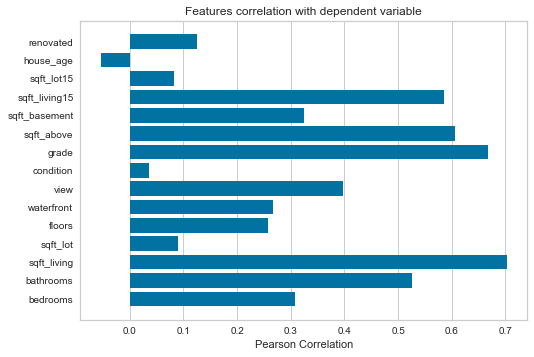

In [7]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof();

### Select K-Best features to predict price of houses

In [8]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression, mutual_info_regression

In [9]:
select_univariate = SelectKBest(mutual_info_regression, #f_regression, 
                                k=5).fit(features, target)

In [10]:
features_mask = select_univariate.get_support()

features_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [11]:
selected_columns = features.columns[features_mask]

selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [12]:
selected_features = features[selected_columns]

selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [13]:
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


In [14]:
from sklearn.preprocessing import scale

X = pd.DataFrame(data=scale(selected_features), columns=selected_features.columns)

y = target

In [15]:
X.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.788439e-16,2.419652e-16,2.524855e-16,1.104624e-16,8.153176e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [17]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = linear_regression.predict(X_test)

In [19]:
df = pd.DataFrame({'test': y_test, 'Predicted': y_pred})

df.head()

,test,Predicted
20308,525000.0,389989.212569
16885,264500.0,308182.916715
4579,238000.0,435104.208552
3715,240000.0,343759.118346
9544,175000.0,371758.588872


In [20]:
from sklearn.metrics import r2_score

score = linear_regression.score(X_train, y_train)
r2score = r2_score(y_test, y_pred)

In [21]:
print('Score: {}'.format(score))
print('r2_score: {}'.format(r2score))

Score: 0.5421462420838878
r2_score: 0.5519607350449333


In [22]:
linear_regression.coef_

array([-27114.01911625, 222046.49591758, 129859.31518511, -67574.90586619,
        19993.85190639])

In [23]:
linear_regression.intercept_

540115.0957720325

In [24]:
import statsmodels.api as sm

### Fit and predict

In [25]:
X_train = sm.add_constant(X_train)

In [26]:
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_train)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     4093.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:50:37   Log-Likelihood:            -2.3928e+05
No. Observations:               17290   AIC:                         4.786e+05
Df Residuals:                   17284   BIC:                         4.786e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.401e+05   1885.155    286.510

In [27]:
linear_regression.intercept_

540115.0957720325

In [28]:
linear_regression.coef_

array([-27114.01911625, 222046.49591758, 129859.31518511, -67574.90586619,
        19993.85190639])